# Question

The information of sunlight and solar panels are in two different Excel files.
- Combine all the data
- Clean the data
- Export the clean data
- Analyse the data

In [51]:
import pandas as pd

In [52]:
# Load data

raw_df_1 = pd.read_excel('data/solar_data_1.xlsx', engine='openpyxl')
raw_df_2 = pd.read_excel('data/solar_data_2.xlsx', engine='openpyxl')

In [53]:
# Check for the shapes

print(f'DataFrame 1 shape: {raw_df_1.shape},\nDataFrame 2 shape: {raw_df_2.shape}, ')

DataFrame 1 shape: (21, 7),
DataFrame 2 shape: (34, 7), 


In [54]:
# Check all fileds are the same in both DataFrames

raw_df_1_field_set = set(raw_df_1.columns)
raw_df_2_field_set = set(raw_df_2.columns)

print(f'DataFrames fields are identical: {raw_df_1_field_set == raw_df_2_field_set}')

DataFrames fields are identical: True


In [55]:
# DataFrames are consistent, so they can be concatenated

df = pd.concat([raw_df_1, raw_df_2])

In [56]:
# Check for duplicated values and delete them

print(f'Number of duplicated records: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

Number of duplicated records: 3


In [57]:
# Examine DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      52 non-null     int64  
 2   kw_total                    52 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   52 non-null     float64
 6   existing_installs_count     51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


* There are some missing values
* DataTypes are correct

In [58]:
# Check 'state_name' field

df['state_name'].value_counts()

Alabama                 1
Pennsylvania            1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Rhode Island            1
Montana                 1
South Carolina          1
South Dakota            1
Tennessee               1
Texas                   1
Utah                    1
Vermont                 1
Virginia                1
Washington              1
West Virginia           1
Wisconsin               1
Nebraska                1
Missouri                1
Alaska                  1
Idaho                   1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Illinois    

In [59]:
# Since the DataFrame consists of states for only one record and all states are present, the missing value in this column should be an error and will be removed.

df.dropna(subset=['state_name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   50 non-null     float64
 4   yearly_sunlight_kwh_median  50 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


array([[<AxesSubplot:title={'center':'kw_median'}>,
        <AxesSubplot:title={'center':'yearly_sunlight_kwh_median'}>],
       [<AxesSubplot:title={'center':'existing_installs_count'}>,
        <AxesSubplot:>]], dtype=object)

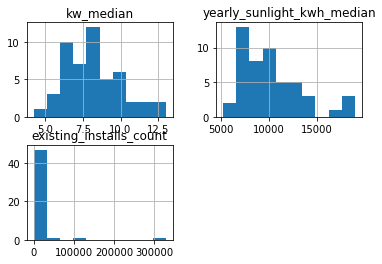

In [60]:
# Check the distribution of fields with missing values

df[['kw_median', 'yearly_sunlight_kwh_median', 'existing_installs_count']].hist()

In [61]:
# Both 'kw_median' and 'yearly_sunlight_kwh_median' are somehow sckewd normal distribution, so the missing value will be filled with median.

df['kw_median'].fillna(df['kw_median'].median(), inplace=True)
df['yearly_sunlight_kwh_median'].fillna(df['yearly_sunlight_kwh_median'].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [62]:
# 'existing_installs_count' is concentrated on an specific region, so the missing value will be filled with mode.

df['existing_installs_count'].fillna(df['existing_installs_count'].mode(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [63]:
# Save cleaned data

df.to_excel('cleaned_solar_data.xlsx', index=False)

In [64]:
# Examine correlation

df.corr()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.292546,0.303214,0.995478,0.818074
kw_total,1.000000,1.000000,0.292546,0.303214,0.995478,0.818074
kw_median,0.292546,0.292546,1.000000,0.920713,0.318872,0.273429
yearly_sunlight_kwh_median,0.303214,0.303214,0.920713,1.000000,0.343703,0.326113
yearly_sunlight_kwh_total,0.995478,0.995478,0.318872,0.343703,1.000000,0.855928
existing_installs_count,0.818074,0.818074,0.273429,0.326113,0.855928,1.000000


In [65]:
# It seems 'median' fields dont have good correlation with the rest.
# In addition, 'number_of_panels_total' is proportional of 'kw_total'.
# So they are droped.

df.drop(['kw_median', 'yearly_sunlight_kwh_median', 'number_of_panels_total'], axis=1, inplace=True)

<AxesSubplot:xlabel='yearly_sunlight_kwh_total', ylabel='existing_installs_count'>

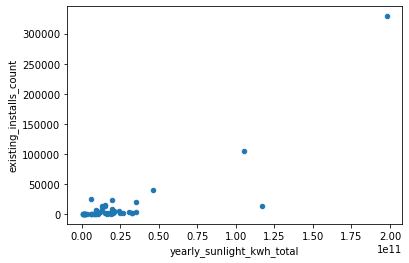

In [66]:
# Check relationship between 'existing_installs_count' and 'yearly_sunlight_kwh_total'

df.plot.scatter(x='yearly_sunlight_kwh_total', y='existing_installs_count')

In [67]:
# Let's find states with most sunlight

df.sort_values(by='yearly_sunlight_kwh_total', ascending=False).head()

,state_name,kw_total,yearly_sunlight_kwh_total,existing_installs_count
5,California,1.327557e+08,1.980163e+11,328899.0
23,Texas,8.701372e+07,1.171552e+11,13969.0
10,Florida,7.642059e+07,1.050627e+11,104123.0
3,Arizona,2.867445e+07,4.639329e+10,39553.0
12,New York,3.041255e+07,3.492613e+10,19979.0


In [68]:
# Let's find states with most panels

df.sort_values(by='existing_installs_count', ascending=False).head()

,state_name,kw_total,yearly_sunlight_kwh_total,existing_installs_count
5,California,1.327557e+08,1.980163e+11,328899.0
10,Florida,7.642059e+07,1.050627e+11,104123.0
3,Arizona,2.867445e+07,4.639329e+10,39553.0
12,Hawaii,3.992278e+06,6.004369e+09,25414.0
6,Colorado,1.379369e+07,1.970758e+10,24140.0


The situation in 'California', 'Florida' and 'Arizona' seems normal. More sunlight, more tendency to use solar panels.
However, 'Hawaii' and 'Colorado' have more solar panels despite of lower sunlight, which may relate to expensive electricity or governmental incentives.